In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

RESULT_DIR = '../result/'

def safe_read_csv(path):
    if not os.path.exists(path):
        print(f"파일이 존재하지 않습니다: {path}")
        return None
    return pd.read_csv(path)

def load_graph_results(prefix, result_dir=RESULT_DIR):
    nodes = safe_read_csv(os.path.join(result_dir, f"{prefix}_nodes.csv"))
    edges = safe_read_csv(os.path.join(result_dir, f"{prefix}_edges.csv"))
    return nodes, edges

baseline_nodes, baseline_edges = load_graph_results('baseline')
adaptive_nodes, adaptive_edges = load_graph_results('adaptive')

In [27]:
def plot_graph(nodes, edges, title, edge_alpha=0.002, node_size=0.1):
    import matplotlib.colors as mcolors
    G = nx.Graph()
    for _, row in nodes.iterrows():
        G.add_node(row['node_id'], label=row['cluster_label'], pos=(row['longitude'], row['latitude']))
    for _, row in edges.iterrows():
        G.add_edge(row['source'], row['target'])
    labels = nx.get_node_attributes(G, 'label')
    unique_labels = sorted(set(labels.values()))
    # 3종류 클러스터면 RGB로 지정
    if len(unique_labels) == 3:
        rgb_colors = [(1,0,0), (0,1,0), (0,0,1)]
        color_map = {label: rgb_colors[i] for i, label in enumerate(unique_labels)}
    else:
        color_map = {label: plt.cm.tab20(i) for i, label in enumerate(unique_labels)}
    node_colors = [color_map[labels[n]] for n in G.nodes()]
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 4))
    nx.draw_networkx_edges(G, pos, alpha=edge_alpha)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.show()

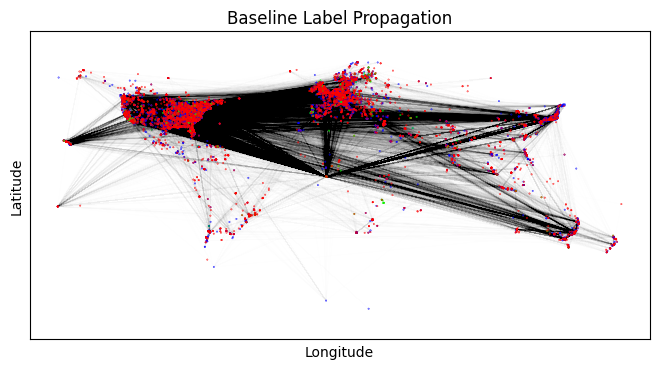

In [28]:
plot_graph(baseline_nodes, baseline_edges, 'Baseline Label Propagation')

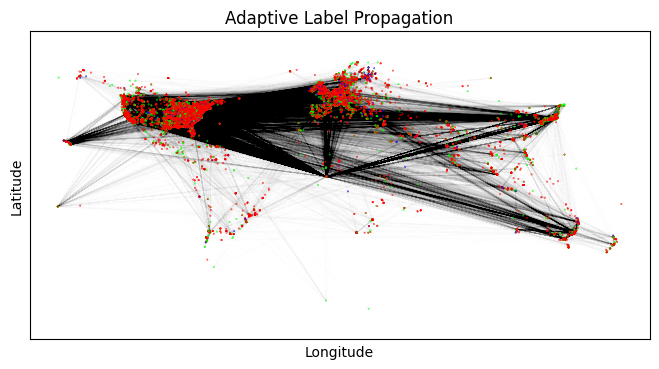

In [29]:
plot_graph(adaptive_nodes, adaptive_edges, 'Adaptive Label Propagation')